In [4]:
#pip install pyathena

In [5]:
#Libraries
from pyathena import connect
import pandas as pd
import datetime as dt
from datetime import datetime

In [6]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name= 'analytics'
table_name = 'daily_check'

In [7]:
#Connection to daily_check (based on receiver)
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')
df = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name}.{table_name};', conn)

/tmp/ipykernel_1093/2235117015.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name}.{table_name};', conn)


In [8]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df['amount'].sum()

25110624454.4149

In [9]:
df['payer_country'] = df['payer']+'_'+df['country']

In [10]:
# Elimino ceros
df = df[df['amount'] != 0]

In [11]:
df['avg'] = df['amount']/df['tx']

In [12]:
df.describe()

,date,tx,amount,coupon_count,avg
count,93018,93018.000000,9.301800e+04,93018.000000,93018.000000
mean,2022-06-25 03:45:30.594078208,588.385409,2.699545e+05,72.697682,452.766216
min,2020-12-31 00:00:00,1.000000,1.000000e+00,0.000000,1.000000
25%,2021-10-12 00:00:00,13.000000,5.394250e+03,0.000000,281.856941
50%,2022-07-13 00:00:00,91.000000,3.552221e+04,2.000000,400.000000
75%,2023-03-14 00:00:00,442.000000,1.742184e+05,17.000000,564.905611
max,2023-10-21 00:00:00,29203.000000,1.391208e+07,11564.000000,7950.000000
std,NaN,1867.914359,8.941920e+05,378.282519,296.597330


In [9]:
df[df['coupon_count']>df['tx']]

,payer,country,date,tx,amount,coupon_count
49,BANCO DE CREDITO DEL PERU - BCP (TN),PERU,2021-03-14,1,215.00,2
282,CREDOMATIC,EL SALVADOR,2020-12-31,78,21850.00,80
591,FUNDACION DONDE (BTS),MEXICO,2021-08-23,0,0.00,1
596,M. LHUILLIER,PHILIPPINES,2021-10-18,16,7589.00,17
1158,AFEX,CHILE,2021-02-14,1,230.00,2
...,...,...,...,...,...,...
100120,TELECOMM TELEGRAFOS (BTS),MEXICO,2021-05-26,21,10545.00,23
101349,TELECOMM TELEGRAFOS (BTS),MEXICO,2021-05-16,27,12878.96,28
101391,TIGO MONEY,EL SALVADOR,2021-07-15,0,0.00,1
101429,TELECOMM TELEGRAFOS (BTS),MEXICO,2021-03-04,359,197506.64,372


In [13]:
df[df['coupon_count'] == 11564.000000] # DIA DE LA MADRE?

,payer,country,date,tx,amount,coupon_count,payer_country,avg
49183,ELEKTRA (MEXICO),MEXICO,2021-05-08,18046,6274329.3,11564,ELEKTRA (MEXICO)_MEXICO,347.685321


In [17]:
df.sort_values('coupon_count', ascending=False).head(40)

,payer,country,date,tx,amount,coupon_count,payer_country,avg
41888,ELEKTRA (MEXICO),MEXICO,2021-05-08,18046,6.274329e+06,11564,ELEKTRA (MEXICO)_MEXICO,347.685321
48978,ELEKTRA (MEXICO),MEXICO,2021-05-09,17833,5.617605e+06,11377,ELEKTRA (MEXICO)_MEXICO,315.011749
30218,ELEKTRA (MEXICO),MEXICO,2021-05-10,14497,4.647011e+06,9350,ELEKTRA (MEXICO)_MEXICO,320.549841
84291,ELEKTRA (MEXICO),MEXICO,2021-05-07,14164,5.619143e+06,9126,ELEKTRA (MEXICO)_MEXICO,396.720059
21632,ELEKTRA (MEXICO),MEXICO,2021-03-06,12460,5.301096e+06,8916,ELEKTRA (MEXICO)_MEXICO,425.449115
59476,ELEKTRA (MEXICO),MEXICO,2021-03-20,12582,5.255737e+06,8822,ELEKTRA (MEXICO)_MEXICO,417.718696
32570,ELEKTRA (MEXICO),MEXICO,2021-06-19,17047,6.987011e+06,8736,ELEKTRA (MEXICO)_MEXICO,409.867458
70053,ELEKTRA (MEXICO),MEXICO,2021-04-10,12470,5.142656e+06,8375,ELEKTRA (MEXICO)_MEXICO,412.402269
36743,ELEKTRA (MEXICO),MEXICO,2021-01-30,10695,4.181547e+06,8363,ELEKTRA (MEXICO)_MEXICO,390.981475
60197,ELEKTRA (MEXICO),MEXICO,2021-05-01,12925,5.741428e+06,8315,ELEKTRA (MEXICO)_MEXICO,444.211065


In [18]:
# Correlacion entre cupones y montos
df[['coupon_count', 'amount']].corr() # correlación positiva moderada

,coupon_count,amount
coupon_count,1.000000,0.362802
amount,0.362802,1.000000


In [19]:
df[['coupon_count', 'tx']].corr() # correlación positiva moderada

,coupon_count,tx
coupon_count,1.000000,0.386337
tx,0.386337,1.000000


In [20]:
# Correlacion entre cupones y promedios
df[['coupon_count', 'avg']].corr() # despreciable

,coupon_count,avg
coupon_count,1.000000,0.001188
avg,0.001188,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


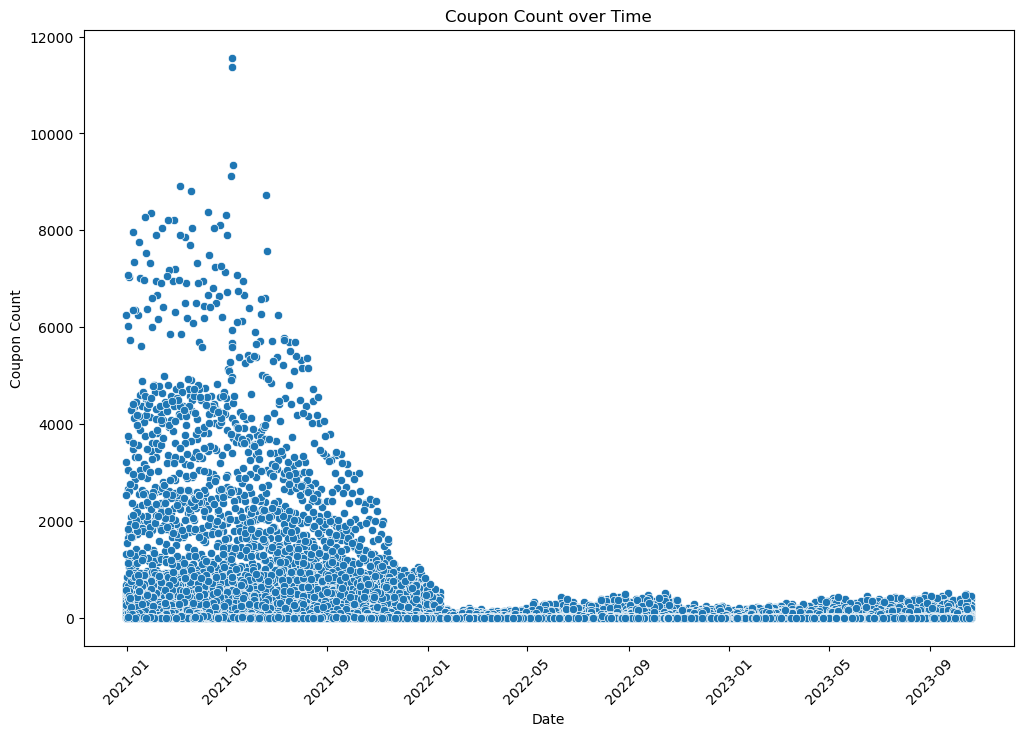

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8)) # Set the size of the figure

# Scatter plot
sns.scatterplot(x='date', y='coupon_count', data=df)

# Titles and labels
plt.title('Coupon Count over Time')
plt.xlabel('Date')
plt.ylabel('Coupon Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


In [22]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [24]:
df[df['year'] == 2021].groupby('month')['coupon_count'].sum().reset_index()

,month,coupon_count
0,1,777524
1,2,711077
2,3,797984
3,4,726606
4,5,765122
5,6,593254
6,7,524051
7,8,421171
8,9,295551
9,10,243522


In [25]:
df[df['year'] == 2022].groupby('month')['coupon_count'].sum().reset_index()

,month,coupon_count
0,1,39033
1,2,15060
2,3,11665
3,4,16395
4,5,28117
5,6,24501
6,7,25502
7,8,34442
8,9,37757
9,10,35503


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


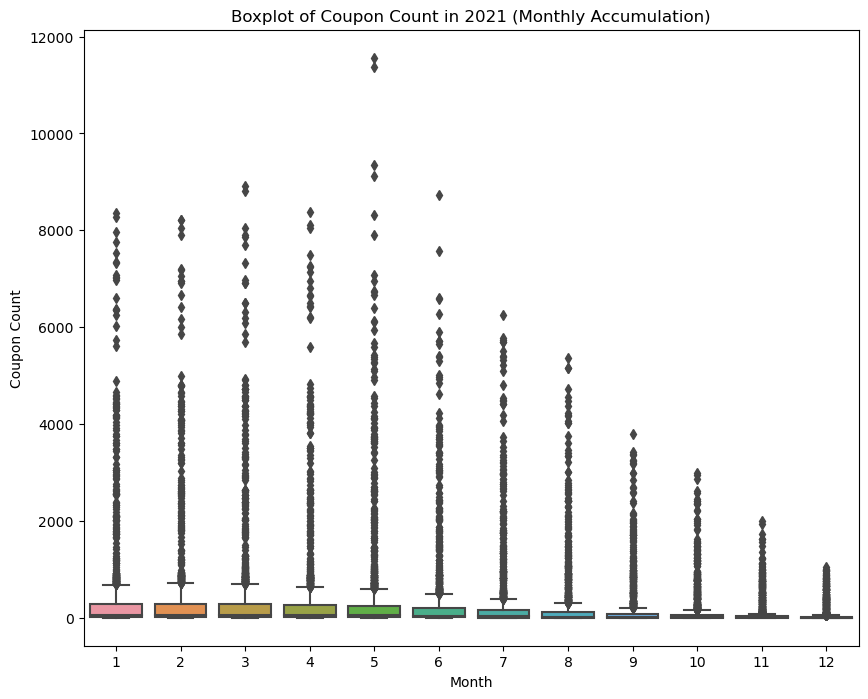

In [38]:
target_year = 2021

# Set the size of the figure

plt.figure(figsize=(10, 8))

# Boxplot
sns.boxplot(x='month', y='coupon_count', data=df[df['year'] == target_year])

# Titles and labels
plt.title(f'Boxplot of Coupon Count in {target_year} (Monthly Accumulation)')
plt.xlabel('Month')
plt.ylabel('Coupon Count')

plt.show()


In [48]:
# Group by month and year, and sum the coupon_count
monthly_totals = df.groupby(['month', 'year'])[['coupon_count','tx']].sum().reset_index()

In [50]:
monthly_totals['coupon_avg'] = monthly_totals['tx']/monthly_totals['coupon_count']

In [53]:
monthly_totals.sort_values(['year','month'])

,month,year,coupon_count,tx,coupon_avg
32,12,2020,23318,28264,1.212111
0,1,2021,777524,957934,1.232031
3,2,2021,711077,921832,1.296388
6,3,2021,797984,1122658,1.406868
9,4,2021,726606,1114035,1.533204
12,5,2021,765122,1286257,1.681114
15,6,2021,593254,1184660,1.996885
18,7,2021,524051,1215714,2.319839
21,8,2021,421171,1292251,3.068234
24,9,2021,295551,1249835,4.228830


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


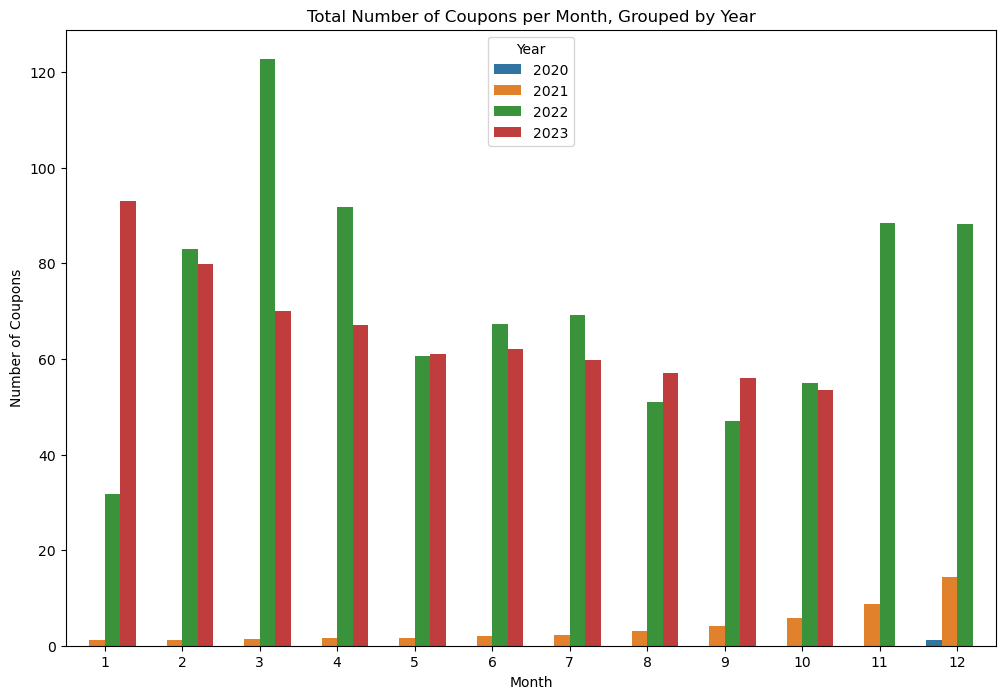

In [52]:
plt.figure(figsize=(12, 8))

# Bar plot with different colors for each year
sns.barplot(x='month', y='coupon_avg', hue='year', data=monthly_totals)

# Titles and labels
plt.title('Total Number of Coupons per Month, Grouped by Year')
plt.xlabel('Month')
plt.ylabel('Number of Coupons')

plt.legend(title='Year')

plt.show()